## **WEEK 1** : Introduction to Machine Learning

### **Task 1.2** : Data Cleaning and Preparation

In [1]:
import pandas as pd
import seaborn as sns

First of all import the data set that can be either imported or by using seaborn Library.

In [2]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now to check if there are any null values. We check that by using `dataset.isnull() `command and it gives us false if there is a value and True if there is a null value involved. 

In [4]:
data.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


`.sum()` at the end gives us total number of null values. 

In [5]:
print(data.shape)
data.isnull().sum()

(891, 15)


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

There many null values involved. We can either imputate them or just drop the column. As deck column has 688 null values out of 891, it is better to drop the column. 

In [6]:
data.drop('deck', axis=1, inplace=True)
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

As now we have to amputate the rows of **age** column by filling it with mean value of age. 

In [7]:
data['age'].fillna(data['age'].mean(), inplace=True)

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_7744\1829737370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


In [8]:
# Checking if there are still null values present
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

Now embark and embark_town has 2 null values, it is better to fill with `mode()`. Mode of an columns is most occuring item in the column. To do that: 

In [9]:
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_7744\879075962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)


Same is now done for embark_town

In [10]:
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_7744\2719678445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)


Checking again to verify if there are still any null values present. 

In [11]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Outliner

Now checking for any outliner is present in **fare** column of dataset. An easy method is Visulizing data to check whether an Outiner is present or not.

<Axes: xlabel='fare'>

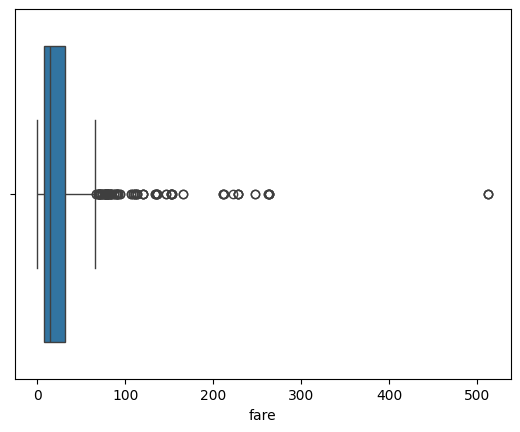

In [12]:
sns.boxplot(data, x='fare')

Now by using statistical method for removing outliners. 

In [13]:
import numpy as np

# These lines calculate the first quartile (Q1) and the third quartile (Q3) of the 'fare' column in the 'data' DataFrame. 
# The quantile() function calculates the value at the specified quantile (0.25 for Q1 
# and 0.75 for Q3), which represent the lower and upper limits of the middle 50% of the data, respectively.
Q1 = data['fare'].quantile(0.25)    # Q1 = lower limit
Q3 = data['fare'].quantile(0.75)    # Q3 = upper limit

# This line calculates the interquartile range (IQR), which is the difference between the third and first quartiles.
IQR = Q3 - Q1
ub = Q3 +(1.5*IQR)      # ub = upper bound
lb = Q1 -(1.5*IQR)      # lb = lower bound
data['fare'] = np.where(data['fare'] < lb, lb, data['fare'])
data['fare'] = np.where(data['fare'] > ub, ub, data['fare'])

<Axes: ylabel='fare'>

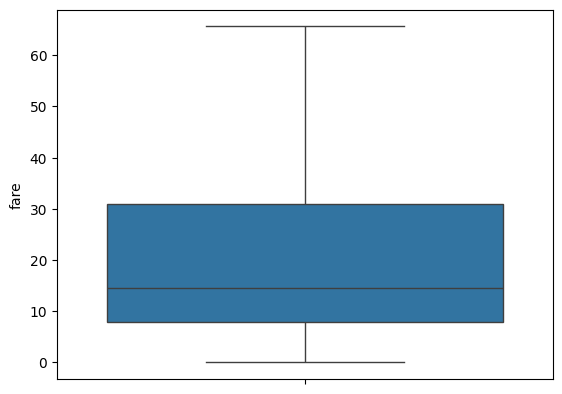

In [15]:
sns.boxplot(data, y='fare')

## Data Transformation

In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

ModuleNotFoundError: No module named 'sklearn'

In [26]:
# Convert categorical data into numeric format using One-Hot Encoding
titanic = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], drop_first=True)


In [27]:
# Standardize numerical values for 'age' and 'fare'
scaler = StandardScaler()
titanic[['age', 'fare']] = scaler.fit_transform(titanic[['age', 'fare']])

# Inspect the cleaned and transformed dataset
print(titanic.head())

NameError: name 'StandardScaler' is not defined

In [28]:
# Save the cleaned dataset to a new CSV file
titanic.to_csv('cleaned_titanic.csv', index=False)